In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('iris.csv')

In [17]:
encoder = LabelEncoder()
df['variety'] = encoder.fit_transform(df['variety'])
for x in range(len(df['variety'])):
    if df['variety'][x] != 0:
        df['variety'][x] = 1

/tmp/ipykernel_64193/129722811.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['variety'][x] = 1
/tmp/ipykernel_64193/129722811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [18]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [19]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [20]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.bias = 0
    
    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        return np.array([self.activation(np.dot(x, self.weights) + self.bias) for x in X])
    
    def train(self, X, y, epochs=10, learning_rate=0.1):
        self.weights = np.zeros(X.shape[1])
        errors = []

        for _ in range(epochs):
            total_err =0
            for xi,target in zip(X,y):
                update = learning_rate*(target-self.predict([xi])[0])
                self.weights += update * xi
                self.bias += update
                total_err += int(update != 0.0)
            errors.append(total_err)
        return errors    

[2, 2, 1, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_64193/239015777.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  total_err += int(update != 0.0)


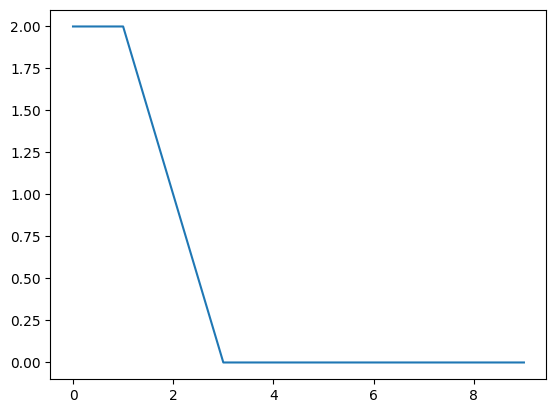

In [23]:
perceptron = Perceptron()
errors = perceptron.train(X.to_numpy(), Y.to_numpy(), epochs=10, learning_rate=0.1)
print(errors)
plt.plot(errors)